This notebook walks through the process of predicting pizza prices using machine learning. We start by cleaning and exploring a dataset, then train several models to predict pizza prices. The goal is to compare different models, see which one works best, and understand which factors influence pizza pricing.

Data Preprocessing:
- We load the pizza data and clean the price column by removing currency symbols and commas, and then convert the prices from Indonesian Rupiah (IDR) to USD.
- Since some of the data columns are categorical (like toppings, variants, etc.), we use label encoding to convert them into numerical values for the models.

Exploratory Data Analysis (EDA):
- We start by visualizing the price distribution to see how prices are spread across the dataset.
- We also take a look at the frequency of different pizza diameters, toppings, variants, and sizes using bar charts and count plots.
- Boxplots are used to explore the relationship between price and factors like toppings or size.

Model Training:
- We split the data into a training set and a test set.
- Then, we train five different regression models to predict pizza prices:
- Random Forest
- Support Vector Machine (SVM)
- Linear Regression
- Gradient Boosting
- XGBoost

Model Evaluation
- We evaluate each model’s performance using the R2 score, which shows how well the model is predicting the prices.
- A bar plot is used to compare the R2 scores of all five models to see which one performs the best.

We also look at which features are most important for predicting pizza prices. This is done by examining the feature importance values from the Random Forest, Gradient Boosting, and XGBoost models.
We use bar charts to visualize these feature importances.

After training the models, we save the best-performing one (Gradient Boosting) using joblib so we can use it later to predict prices on new data.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
pizza = pd.read_csv('pizza.csv')
pizza.sample(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
63,C,"Rp98,000",14.0,meat,meat_eater,large,yes,yes
8,A,"Rp90,000",12.0,mushrooms,american_favorite,reguler,yes,no
13,A,"Rp90,000",12.0,black papper,super_supreme,reguler,no,yes
58,C,"Rp35,000",8.5,mushrooms,extravaganza,small,yes,yes
10,A,"Rp140,000",18.5,mozzarella,super_supreme,jumbo,no,no


In [79]:
pizza.rename({'price_rupiah': 'price'}, axis=1, inplace=True)
pizza['price'] = pizza['price'].str.replace('Rp','')
pizza['price'] = pizza['price'].str.replace(',','').astype('int32')
pizza.sample(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
37,B,33000,8.5,chicken,classic,small,no,yes
28,B,49000,12.0,mozzarella,crunchy,medium,no,no
80,D,110000,16.0,smoked beef,meat_lovers,jumbo,no,yes
56,C,72000,12.0,sausage,BBQ_sausage,medium,yes,yes
90,D,46000,12.0,chicken,classic,medium,yes,no


In [80]:
def convert(value):
    return value * 0.01708
pizza['price'] = pizza['price'].apply(convert)
pizza.head(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,4013.80,22.0,chicken,double_signature,jumbo,yes,yes
1,A,3381.84,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,2049.60,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,2647.40,14.0,smoked beef,double_signature,reguler,yes,no
4,A,4235.84,18.0,mozzarella,double_signature,jumbo,yes,no


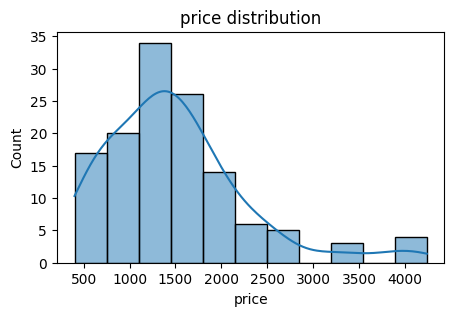

In [8]:
plt.figure(figsize=(5,3))
sns.histplot(x='price', data=pizza, kde=True)
plt.title('price distribution')
plt.show()

<Axes: xlabel='diameter'>

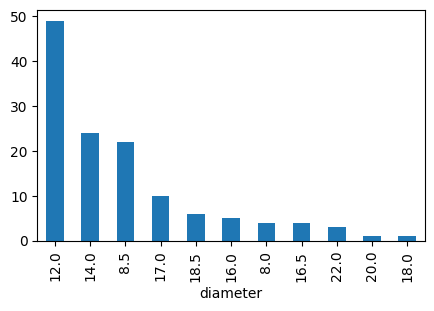

In [9]:
plt.figure(figsize=(5,3))
pizza['diameter'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='topping'>

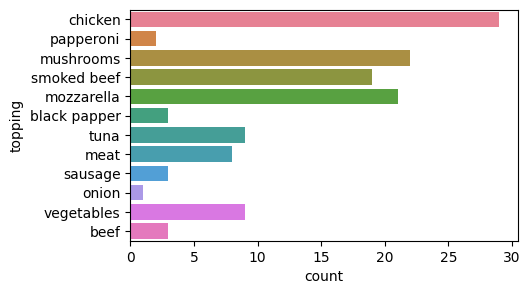

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(y=pizza['topping'], hue=pizza['topping'])

<Axes: xlabel='count', ylabel='variant'>

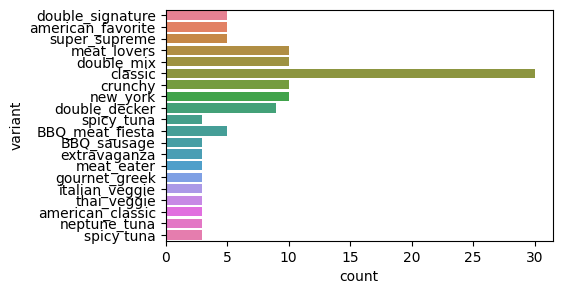

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(y=pizza['variant'], hue=pizza['variant'])

<Axes: xlabel='size', ylabel='count'>

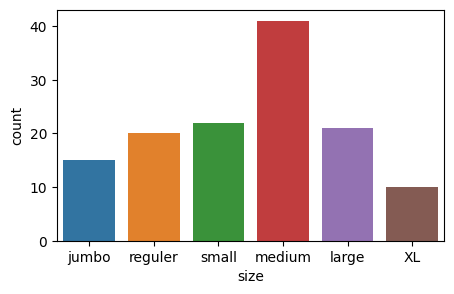

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x = pizza['size'], hue=pizza['size'])

<Axes: xlabel='company', ylabel='price'>

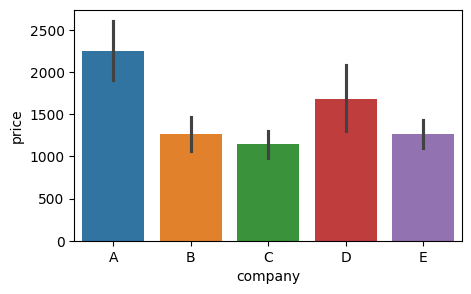

In [13]:
plt.figure(figsize=(5,3))
sns.barplot(data=pizza, x='company', y='price', hue=pizza['company'])

<Axes: xlabel='price', ylabel='topping'>

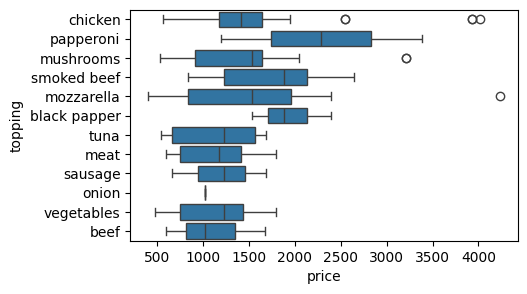

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(data=pizza, x='price', y='topping')  

<Axes: xlabel='size', ylabel='price'>

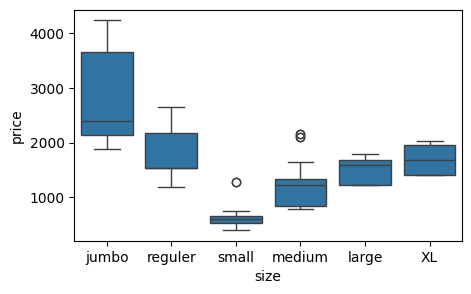

In [15]:
plt.figure(figsize=(5,3))
sns.boxplot(data=pizza, x='size', y='price')

In [81]:
from sklearn.preprocessing import LabelEncoder

df = pizza.select_dtypes(include=['object']).columns
le = LabelEncoder()
for i in df:
    pizza[i] = le.fit_transform(pizza[i])

pizza.sample(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
16,0,1878.80,16.0,9,13,1,0,1
37,1,563.64,8.5,2,4,5,0,1
104,4,1417.64,17.0,2,15,0,0,1
28,1,836.92,12.0,4,5,3,0,0
27,1,1229.76,14.0,9,4,2,1,0


In [83]:
from sklearn.model_selection import train_test_split
X = pizza.drop('price', axis=1)
y = pizza['price']
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

lr = LinearRegression()
lr.fit(X_train, y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

model_1 = lr.predict(X_test)
model_2 = svm.predict(X_test)
model_3 = lr.predict(X_test)
model_4 = gb.predict(X_test)
model_5 = xgb.predict(X_test)

In [86]:
from sklearn import metrics
score_1 = metrics.r2_score(y_test, model_1) 
score_2 = metrics.r2_score(y_test, model_2)
score_3 = metrics.r2_score(y_test, model_3)
score_4 = metrics.r2_score(y_test, model_4)
score_5 = metrics.r2_score(y_test, model_5)
print(score_1, score_2, score_3, score_4, score_5)

0.7035497671692847 0.00684421258594059 0.7035497671692847 0.9315231365049698 0.9235329889107555


In [85]:
model_selection = pd.DataFrame({
    'Models': ['RF', 'SVM', 'LR', 'GB', 'XGB'],
    'R2_SCORE': [score_1, score_2, score_3, score_4, score_5]
})
print(model_selection)

  Models  R2_SCORE
0     RF  0.703550
1    SVM  0.006844
2     LR  0.703550
3     GB  0.931160
4    XGB  0.923533


<Axes: xlabel='Models', ylabel='R2_SCORE'>

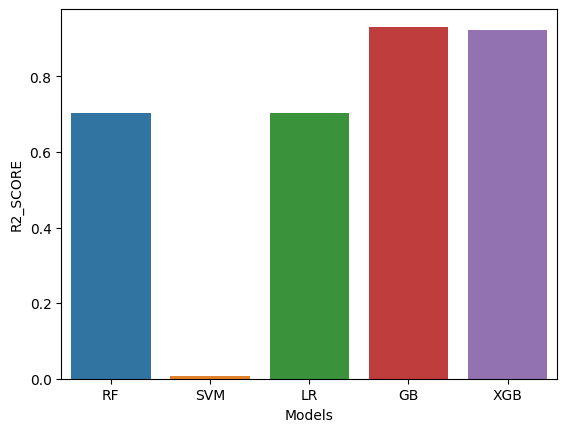

In [48]:
sns.barplot(data=model_selection, x='Models', y='R2_SCORE', hue='Models')

<Axes: >

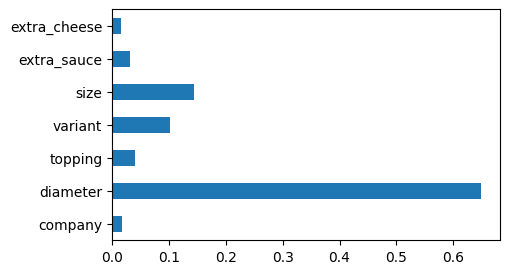

In [87]:
plt.figure(figsize=(5,3))
random_forest = pd.Series(rf.feature_importances_, index=X_train.columns)
random_forest.plot(kind='barh')

<Axes: >

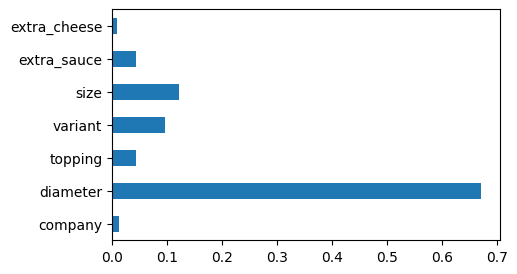

In [88]:
plt.figure(figsize=(5,3))
gradient = pd.Series(gb.feature_importances_, index=X_train.columns)
gradient.plot(kind='barh')

<Axes: >

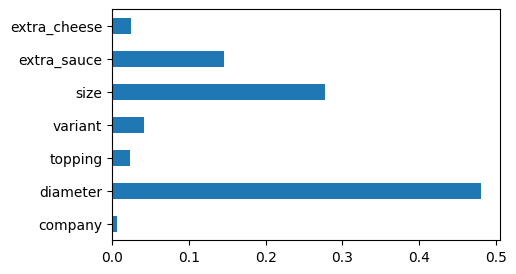

In [89]:
plt.figure(figsize=(5,3))
xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importance.plot(kind='barh')

In [90]:
import joblib
joblib.dump(gb,'PIZZA_PRICE_PREDICT')

['PIZZA_PRICE_PREDICT']